In [ ]:
# 알집푸는 코드
!unzip OpenDataset.zip -d OpenDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets


---

**공개된 학습 데이셋 구조**

OpenDataset

　┖ Sequence01

　　┖ 00000.jpg ~ 00900.jpg

　┖ Sequence02

　　┖ 00000.jpg ~ 00900.jpg

　┖ Sequence03

　　┖ 00000.jpg ~ 00900.jpg

---

---

**공개된 학습용 데이터셋에 대한 설명을 위한 코드**

변수: ***dataset_path*** - 공개된 데이터셋 경로 

시퀀스 이름, 시퀀스 내 이미지 개수를 출력한다.

In [ ]:
dataset_path = './OpenDataset'

for seq_name in os.listdir(dataset_path):
  seq_path = os.path.join(dataset_path, seq_name)
  print('시퀀스 폴더:', seq_name, ', 시퀀스 이미지 개수:', len(os.listdir(seq_path)))

# for img_name in os.listdir(seq_path):
#    img_path = os.path.join(seq_path, img_name)
#    img = cv2.imread(img_path)
#    print(img.shape)
#    cv2_imshow(img)

시퀀스 폴더: Sequence01 , 시퀀스 이미지 개수: 901
시퀀스 폴더: Sequence03 , 시퀀스 이미지 개수: 901
시퀀스 폴더: Sequence02 , 시퀀스 이미지 개수: 901


---

---
**테스트 데이터셋 구조**

TestSequence

　┖ 00000.jpg ~ 00900.jpg

---

---

**테스트를 위한 경로 입력**

변수: ***test_seq_path*** - 테스트에 사용될 시퀀스의 경로

(제출된 코드에서 다음 경로만 변경하여 채점할 예정)

In [ ]:
test_seq_path = '/content/OpenDataset/Sequence01'

---

---

**테스트 시퀀스의 이미지를 불러오는 class 정의**

테스트 시퀀스 안의 이미지들을 Tensor로 변환하여 내보내주는 Dataset class를 정의

**(각자 방법에 따라 class 내부를 수정해서 사용 )**

변수: ***imgPathes*** - 테스트 시퀀스 내 이미지들의 경로를 저장하는 list

함수: 

*__init__* - 시퀀스 내 이미지들의 경로를 imgPathes에 저장

*__getitem__* - 저장된 이미지들의 경로를 통해 이미지를 불러오고 텐서로 변환하여 출력한다. (PyTorch의 DataLoader, for 반복문 등에 의해 호출되는 함수)



In [ ]:
class testSequenceDataset(Dataset):
  def __init__(self, _test_seq_path):
    self.imgPathes = []

    # 시퀀스 내 이미지 경로들을 list에 저장(이름순 정렬)
    for _img_name in sorted(os.listdir(_test_seq_path)):
      img_path = os.path.join(_test_seq_path, _img_name)
      self.imgPathes.append(img_path)
  
  def __len__(self):
    return len(self.imgPathes)

  def __getitem__(self, idx):
    _img = cv2.imread(self.imgPathes[idx])
    _img = _img.astype(np.float32) / 255.0    # integer타입이면 0~255사이의 값을 가질 것으로 가정, float타입이면 0~1사이의 값을 가질 것으로 가정 -> 그래서 float타입의 경우 255로 나눠줘야한다.
    _img_tensor = torch.from_numpy(img.transpose(2, 0, 1))

    return _img_tensor


테스트 데이터셋 생성

In [ ]:
testDataset = testSequenceDataset(test_seq_path)
print('테스트 데이터셋의 이미지 개수:', len(testDataset.imgPathes))
print(testDataset.imgPathes)

테스트 데이터셋의 이미지 개수: 901
['/content/OpenDataset/Sequence01/00000.jpg', '/content/OpenDataset/Sequence01/00001.jpg', '/content/OpenDataset/Sequence01/00002.jpg', '/content/OpenDataset/Sequence01/00003.jpg', '/content/OpenDataset/Sequence01/00004.jpg', '/content/OpenDataset/Sequence01/00005.jpg', '/content/OpenDataset/Sequence01/00006.jpg', '/content/OpenDataset/Sequence01/00007.jpg', '/content/OpenDataset/Sequence01/00008.jpg', '/content/OpenDataset/Sequence01/00009.jpg', '/content/OpenDataset/Sequence01/00010.jpg', '/content/OpenDataset/Sequence01/00011.jpg', '/content/OpenDataset/Sequence01/00012.jpg', '/content/OpenDataset/Sequence01/00013.jpg', '/content/OpenDataset/Sequence01/00014.jpg', '/content/OpenDataset/Sequence01/00015.jpg', '/content/OpenDataset/Sequence01/00016.jpg', '/content/OpenDataset/Sequence01/00017.jpg', '/content/OpenDataset/Sequence01/00018.jpg', '/content/OpenDataset/Sequence01/00019.jpg', '/content/OpenDataset/Sequence01/00020.jpg', '/content/OpenDataset/Sequence01

---

---

**문제풀이를 위한 카운트 변수 선언**

문제를 푸는 코드에서 해당 변수를 적절한 시점에 카운트한다.

In [ ]:
# 문제 변수
num_sec1 = 0       # section1을 통과한 차량 대수
num_sec2 = 0       # section2을 통과한 차량 대수
num_sec3 = 0       # section3을 통과한 차량 대수
num_sec4 = 0       # section4을 통과한 차량 대수
num_straight = 0   # 직진 차량 대수
num_left_turn = 0  # 좌회전 차량 대수
num_right_turn = 0 # 우회전 차량 대수

---

---

**
***문제풀이 코드 입력***
**

---

In [ ]:
img = mpimg.imread('/content/OpenDataset/Sequence02/00000.jpg')
print(img.shape)

(240, 320, 3)


In [ ]:
# 이미지 자르기 수행하는 함수
def region_of_interest(img, vertices) :
  # 이미지 높이/ 너비와 일치하는 빈 행렬을 정의한다.
  mask = np.zeros_like(img)

  # 이미지의 색상 채널 수를 검색한다.
  channel_count = img.shape[2]

  # 동일한 색상 채널 수로 일치 색상을 만든다.
  match_mask_color = (255,) * channel_count

  # 다각형 내부 채우기
  cv2.fillPoly(mask, vertices, match_mask_color)

  # 마스크 픽셀이 일치하는 이미지만 변환
  masked_image = cv2.bitwise_and(img, mask)
  return masked_image

In [ ]:
height = 240
width = 320 

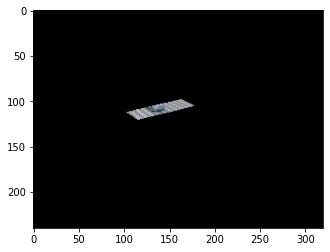

In [ ]:
region_of_interest_vertices = [(103, 112), (115, 120), (177,105), (163, 98),]
img = mpimg.imread('/content/OpenDataset/Sequence02/00000.jpg')
section1 = region_of_interest(img, np.array([region_of_interest_vertices], np.int32))

plt.figure()
plt.imshow(section1)

plt.show()

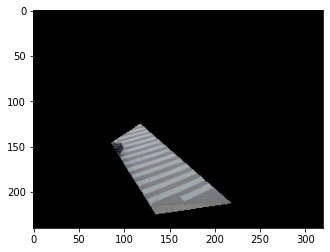

In [ ]:
region_of_interest_vertices = [(135, 224), (218, 212), (118, 125), (86, 146),]
img = mpimg.imread('/content/OpenDataset/Sequence02/00000.jpg')
section2 = region_of_interest(img, np.array([region_of_interest_vertices], np.int32))

plt.figure()
plt.imshow(section2)

plt.show()

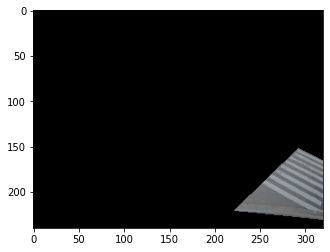

In [ ]:
region_of_interest_vertices = [(292, 152), (222, 220), (width, 230), (width, 165),]
img = mpimg.imread('/content/OpenDataset/Sequence02/00000.jpg')
section3 = region_of_interest(img, np.array([region_of_interest_vertices], np.int32))

plt.figure()
plt.imshow(section3)

plt.show()

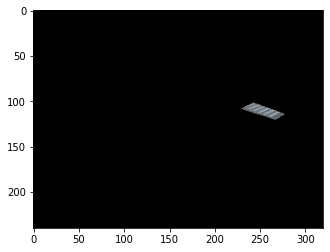

In [ ]:
region_of_interest_vertices = [(243, 102), (230, 108), (267, 120), (277, 114),]
img = mpimg.imread('/content/OpenDataset/Sequence02/00000.jpg')
section4 = region_of_interest(img, np.array([region_of_interest_vertices], np.int32))

plt.figure()
plt.imshow(section4)

plt.show()

In [ ]:
Path = '/content/OpenDataset/Sequence02'
imgPathes = []

# 시퀀스 내 이미지 경로들을 list에 저장(이름순 정렬)
for _img_name in sorted(os.listdir(Path)):
  img_path = os.path.join(Path, _img_name)
  imgPathes.append(img_path)

print(imgPathes)

# 움직이는 차량 차이
# for i in range(0, len(imgPathes)-1):
#   img_prev = cv2.imread(imgPathes[i], cv2.IMREAD_GRAYSCALE)
#   img_cur = cv2.imread(imgPathes[i+1], cv2.IMREAD_GRAYSCALE)
#   img_sub = cv2.subtract(img_prev, img_cur)
#   cv2_imshow(img_sub)

['/content/OpenDataset/Sequence02/00000.jpg', '/content/OpenDataset/Sequence02/00001.jpg', '/content/OpenDataset/Sequence02/00002.jpg', '/content/OpenDataset/Sequence02/00003.jpg', '/content/OpenDataset/Sequence02/00004.jpg', '/content/OpenDataset/Sequence02/00005.jpg', '/content/OpenDataset/Sequence02/00006.jpg', '/content/OpenDataset/Sequence02/00007.jpg', '/content/OpenDataset/Sequence02/00008.jpg', '/content/OpenDataset/Sequence02/00009.jpg', '/content/OpenDataset/Sequence02/00010.jpg', '/content/OpenDataset/Sequence02/00011.jpg', '/content/OpenDataset/Sequence02/00012.jpg', '/content/OpenDataset/Sequence02/00013.jpg', '/content/OpenDataset/Sequence02/00014.jpg', '/content/OpenDataset/Sequence02/00015.jpg', '/content/OpenDataset/Sequence02/00016.jpg', '/content/OpenDataset/Sequence02/00017.jpg', '/content/OpenDataset/Sequence02/00018.jpg', '/content/OpenDataset/Sequence02/00019.jpg', '/content/OpenDataset/Sequence02/00020.jpg', '/content/OpenDataset/Sequence02/00021.jpg', '/content

---

**문제 정답 출력 부분**


---

In [ ]:
print('문제 정답')
print(f'Section 1: {num_sec1}대')
print(f'Section 2: {num_sec2}대')
print(f'Section 3: {num_sec3}대')
print(f'Section 4: {num_sec4}대')
print(f'직진: {num_straight}대')
print(f'좌회전: {num_left_turn}대')
print(f'우회전: {num_right_turn}대')

문제 정답
Section 1: 0대
Section 2: 0대
Section 3: 0대
Section 4: 0대
직진: 0대
좌회전: 0대
우회전: 0대
